In [476]:
from zipfile import ZipFile
import io
import glob

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statistics as stats

In [477]:
gps = pd.read_csv('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/gps/gps_u00.csv')
gps.head()

,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,NaN
1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN,NaN
1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary,NaN
1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,NaN
1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,NaN


In [478]:
len(gps)

4316

In [479]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/dark/dark_u00.csv'
dark = pd.read_csv(path)
len(dark)

184

In [480]:
bigfive_survey = pd.read_csv('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/BigFive.csv')
len(bigfive_survey)

85

In [481]:
flourishingscale_survey = pd.read_csv('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/FlourishingScale.csv')
len(flourishingscale_survey)

83

In [482]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/EMA/response/Stress/Stress_u00.json'
stress = pd.read_json(path)
print(stress.columns)
print(len(stress))
stress.head()

Index(['null', 'resp_time', 'level', 'location'], dtype='object')
79


,null,resp_time,level,location
0,"43.75908069,-72.32885314",2013-03-24 08:40:01,NaN,NaN
1,"43.75908069,-72.32885314",2013-03-24 08:40:58,NaN,NaN
2,"43.70677151,-72.28746626",2013-03-25 02:16:45,NaN,NaN
3,1,2013-03-25 00:00:18,NaN,NaN
4,1,2013-03-25 02:16:49,NaN,NaN


In [483]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/sensing/bluetooth/bt_u00.csv'
bluetooth = pd.read_csv(path)
print(bluetooth.level.min())

-100


In [484]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/EMA/response/Social/Social_u00.json'
social = pd.read_json(path)
social.head()

,null,resp_time,location,number
0,"43.75908069,-72.32885314",2013-03-24 08:39:53,NaN,NaN
1,"43.75908069,-72.32885314",2013-03-24 08:40:55,NaN,NaN
2,4,2013-03-24 08:39:50,NaN,NaN
3,3,2013-03-25 02:16:15,NaN,NaN
4,"43.75885953,-72.32939114",2013-03-24 22:11:35,NaN,NaN


In [485]:
social.number.unique()

array([nan,  5.,  1.,  3.,  4.,  2.])

In [486]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/EMA/response/Dining Halls/Dining Halls_u00.json'
dining = pd.read_json(path)
dining.head()

,breakfast,dinner,location,lunch,resp_time
0,4,7,"43.70131169,-72.28938663",4,2013-04-26 20:39:40
1,4,8,"43.71722994,-72.30901577",4,2013-04-23 21:13:48
2,7,7,"43.70082504,-72.28929272",7,2013-04-22 20:40:22
3,7,7,"43.70082924,-72.28928288",7,2013-04-22 20:26:24
4,4,8,"43.70511209,-72.28803398",8,2013-05-10 20:01:49


In [487]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/class_info.json'
classinfo = pd.read_json(path)
classinfo.head()

,ANTH 012,BIOL 004,BIOL 006,CHIN 033,CHIN 062,COSC 007,COSC 020,COSC 027,COSC 050,COSC 057,...,MATH 022,MATH 023,MUS 003,MUS 016,NAS 008,NAS 035,PSYC 028,REL 018,SPAN 003,TUCK 003
location,silsby-rocky,lsb,lsb,reed,kemeny,baker-berry,moore,sudikoff,kemeny,sudikoff,...,kemeny,kemeny,hopkins,hopkins,moore,carpenterhall,moore,carson-tech_services,dartmouth_hall,carson-tech_services
periods,"[{'day': 1, 'end': '12:20', 'start': '11:15'},...","[{'day': 2, 'end': '11:50', 'start': '10:00'},...","[{'day': 2, 'end': '11:50', 'start': '10:00'},...","[{'day': 1, 'end': '09:50', 'start': '09:00'},...","[{'day': 2, 'end': '17:50', 'start': '16:00'},...","[{'day': 1, 'end': '14:50', 'start': '13:45'},...","[{'day': 2, 'end': '15:50', 'start': '14:00'},...","[{'day': 1, 'end': '16:50', 'start': '15:00'},...","[{'day': 1, 'end': '13:35', 'start': '12:30'},...","[{'day': 1, 'end': '14:50', 'start': '13:45'},...",...,"[{'day': 1, 'end': '12:20', 'start': '11:15'},...","[{'day': 1, 'end': '12:20', 'start': '11:15'},...","[{'day': 2, 'end': '15:50', 'start': '14:00'},...","[{'day': 2, 'end': '11:50', 'start': '10:00'},...","[{'day': 1, 'end': '13:35', 'start': '12:30'},...","[{'day': 1, 'end': '12:20', 'start': '11:15'},...","[{'day': 1, 'end': '14:50', 'start': '13:45'},...","[{'day': 1, 'end': '14:50', 'start': '13:45'},...","[{'day': 1, 'end': '09:50', 'start': '09:00'},...","[{'day': 2, 'end': '15:50', 'start': '14:00'},..."


In [488]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/class.csv'
classes = pd.read_csv(path, header=None, sep='\n')
classes = classes[0].str.split(',', expand=True)
print(len(classes))
classes.head()

49


,0,1,2,3,4
0,u00,None,None,None,None
1,u01,ENGS 069,ENGS 022,ANTH 012,None
2,u02,COSC 077,COSC 098,COSC 065,None
3,u03,COSC 057,COSC 065,None,None
4,u04,COSC 065,None,None,None


In [489]:
classes['num_classes'] = 4 - classes.isnull().sum(axis=1)

In [490]:
classes.head(20)

,0,1,2,3,4,num_classes
0,u00,None,None,None,None,0
1,u01,ENGS 069,ENGS 022,ANTH 012,None,3
2,u02,COSC 077,COSC 098,COSC 065,None,3
3,u03,COSC 057,COSC 065,None,None,2
4,u04,COSC 065,None,None,None,1
5,u05,COSC 050,PSYC 028,COSC 065,None,3
6,u07,COSC 077,COSC 060,COSC 065,None,3
7,u08,CHIN 062,COSC 089 1,COSC 065,None,3
8,u09,ANTH 050,COSC 065,COSC 099,None,3
9,u10,COSC 050,BIOL 004,COSC 065,None,3


44


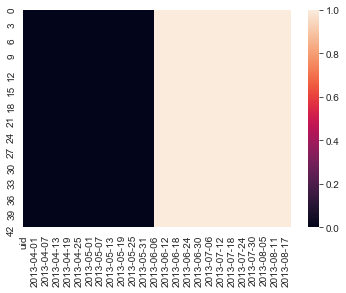

In [491]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/deadlines.csv'
deadlines = pd.read_csv(path)
print(len(deadlines))
sns.heatmap(deadlines.isnull())

In [492]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/grades.csv'
grades = pd.read_csv(path)
print(len(grades))
grades.head()

30


,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


In [493]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/piazza.csv'
piazza = pd.read_csv(path)
piazza.head()

,uid,days online,views,contributions,questions,notes,answers
0,u00,49,162,144,0,67,22
1,u01,29,299,5,1,1,0
2,u02,57,299,0,0,0,0
3,u03,47,262,30,15,2,6
4,u04,27,101,1,1,0,0


In [494]:
for i, df in enumerate([bigfive_survey, flourishingscale_survey, deadlines, grades, piazza]):
    print(i, df['uid'].nunique())

0 47
1 46
2 44
3 30
4 49


In [495]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/education/piazza.csv'
sms = pd.read_csv(path)
sms.head()

,uid,days online,views,contributions,questions,notes,answers
0,u00,49,162,144,0,67,22
1,u01,29,299,5,1,1,0
2,u02,57,299,0,0,0,0
3,u03,47,262,30,15,2,6
4,u04,27,101,1,1,0,0


In [496]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/EMA/response/Sleep/Sleep_u00.json'
sleep = pd.read_json(path)
sleep.head()

,null,resp_time,hour,location,rate,social
0,"43.75908069,-72.32885314",2013-03-24 08:46:00,NaN,NaN,NaN,NaN
1,8,2013-03-24 08:46:05,NaN,NaN,NaN,NaN
2,1,2013-03-24 08:40:53,NaN,NaN,NaN,NaN
3,1,2013-03-24 08:46:15,NaN,NaN,NaN,NaN
4,3,2013-03-24 08:39:25,NaN,NaN,NaN,NaN


In [533]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/panas.csv'
panas = pd.read_csv(path)
panas.columns

Index(['uid', 'type', 'Interested', 'Distressed', 'Upset', 'Strong', 'Guilty',
       'Scared', 'Hostile ', 'Enthusiastic', 'Proud', 'Irritable', 'Alert',
       'Inspired', 'Nervous', 'Determined ', 'Attentive', 'Jittery', 'Active ',
       'Afraid '],
      dtype='object')

In [499]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/psqi.csv'
psqi = pd.read_csv(path)
psqi.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good


In [500]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/vr_12.csv'
vr12 = pd.read_csv(path)
vr12.head()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
0,u00,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,Some of the time,Some of the time,Some of the time,Slightly worse,About the same
1,u01,pre,Excellent,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,About the same,Much better
2,u02,pre,Good,"No, not limited at all","No, not limited at all","Yes, some of the time","No, none of the time","No, none of the time","Yes, a little of the time",Not at all,Most of the time,Some of the time,A little of the time,None of the time,About the same,Slightly better
3,u03,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,Slightly better,Slightly worse
4,u04,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,A little of the time,None of the time,Slightly better,About the same


## Loneliness / Stress Data Exploration

In [528]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/LonelinessScale.csv'
loneliness = pd.read_csv(path)
loneliness.head()

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,11. I feel left out,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to
0,u00,pre,Sometimes,Rarely,Never,Never,Often,Sometimes,Never,Never,...,Rarely,Rarely,Never,Never,Often,Rarely,Often,Sometimes,Often,Often
1,u01,pre,Sometimes,Rarely,Rarely,Sometimes,Often,Often,Never,Never,...,Rarely,Rarely,Never,Rarely,Often,Often,Sometimes,Never,Often,Often
2,u02,pre,Sometimes,Rarely,Rarely,Often,Often,Often,Never,Often,...,Rarely,Never,Never,Never,Often,Often,Never,Never,Often,Often
3,u03,pre,Sometimes,Rarely,Never,Often,Rarely,Rarely,Sometimes,Sometimes,...,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes
4,u04,pre,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Never,Rarely,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Rarely,Rarely


In [502]:
unique_elements = []
for col in loneliness.columns[2:]:
    for element in loneliness[col].unique():
        if element not in unique_elements:
            unique_elements.append(element)
unique_elements

['Sometimes', 'Rarely', 'Often', 'Never']

In [503]:
loneliness[loneliness == 'Never'] = 0
loneliness[loneliness == 'Rarely'] = 1
loneliness[loneliness == 'Sometimes'] = 2
loneliness[loneliness == 'Often'] = 3

In [504]:
loneliness_std = loneliness.copy()
loneliness_interp = loneliness.copy()
flip_vars = {'1. I feel in tune with the people around me':
                 '1. I do not feel in tune with the people around me',
             '4. I do not feel alone':
                 '4. I feel alone',
             '5. I feel part of a group of friends':
                 '5. I do not feel part of a group of friends',
             '6. I have a lot in common with the people around me':
                 '6. I do not have a lot in common with the people around me',
             '9. I am an outgoing person':
                 '9. I am not an outgoing person',
             '10. There are people I feel close to':
                 '10. There are not any people I feel close to',
             '15. I can find companionship when I want it':
                 '15. I cannot find companionship when I want it',
             '16. There are people who really understand me':
                 '16. There are not people who really understand me',
             '19. There are people I can talk to':
                 '19. There are not any people I can talk to',
             '20. There are people I can turn to':
                 '20. There are not any people I can turn to'}

for var in flip_vars.keys():
    loneliness_interp.loc[loneliness_std[var]==0, var] = 3
    loneliness_interp.loc[loneliness_std[var]==1, var] = 2
    loneliness_interp.loc[loneliness_std[var]==2, var] = 1
    loneliness_interp.loc[loneliness_std[var]==3, var] = 0

for var in flip_vars.keys():
    # Never to Always
    loneliness_interp.loc[loneliness_interp[var]==0, var] = 4
    # Rarely to Often
    loneliness_interp.loc[loneliness_interp[var]==1, var] = 3
    # Sometimes stays Sometimes
    # Often to Rarely
    loneliness_interp.loc[loneliness_interp[var]==3, var] = 1

loneliness_interp.rename(flip_vars, axis=1, inplace=True)
loneliness_std.rename(flip_vars, axis=1, inplace=True)

In [505]:
loneliness_std['average'] = loneliness_std.iloc[:, 2:].mean(axis=1)

In [506]:
std_sorted = pd.DataFrame({'feature': [var for var in loneliness_std.columns[2:]],
                          'avg': [loneliness_std[col].mean()
                                  for col in loneliness_std.columns[2:]]
                          })
std_sorted.sort_index(by='avg', ascending=False, inplace=True)
std_sorted = ls_sorted.reset_index()

interp_sorted = pd.DataFrame({'feature': [var for var in loneliness_interp.columns[2:]],
                          'avg': [loneliness_std[col].mean()
                                  for col in loneliness_interp.columns[2:]]
                             })
interp_sorted.sort_index(by='avg', ascending=False, inplace=True)
interp_sorted = ls_sorted.reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if sys.path[0] == '':


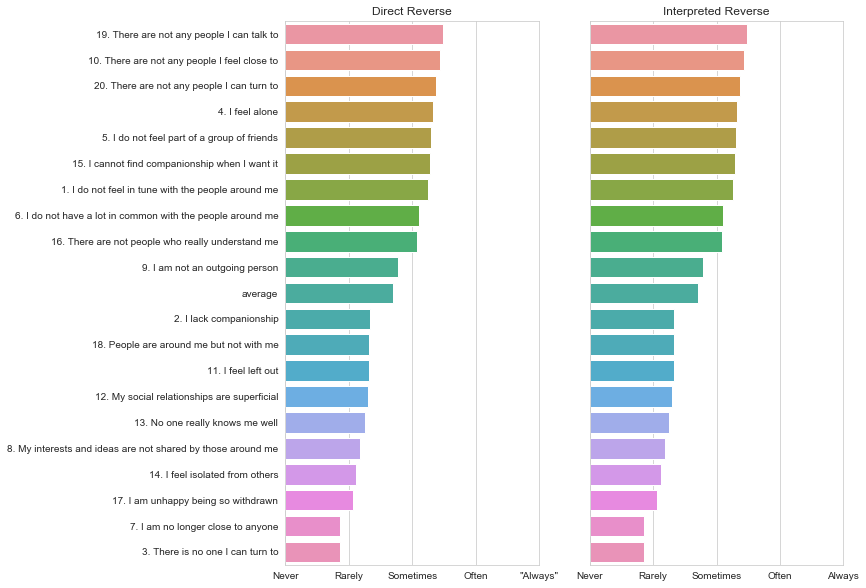

In [507]:
plt.figure(figsize=(10,10))

plt.subplot(121)
bplot = sns.barplot(x=[val for val in std_sorted.avg],
                    y=[var for var in std_sorted.feature])
bplot.set_xticks([0,1,2,3,4])
plt.title('Direct Reverse')
bplot.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', '"Always"'])

plt.subplot(122)
bplot = sns.barplot(x=[val for val in interp_sorted.avg],
                    y=[var for var in interp_sorted.feature])
bplot.set_xticks([0,1,2,3,4])
plt.title('Interpreted Reverse')
bplot.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'])
bplot.set_yticklabels([])

plt.show()

[]

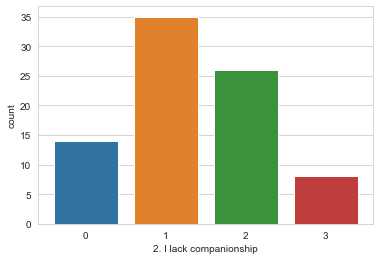

In [508]:
sns.countplot(loneliness_std['2. I lack companionship'])
plt.plot()

Mean before: 1.72
Mean after: 1.68 



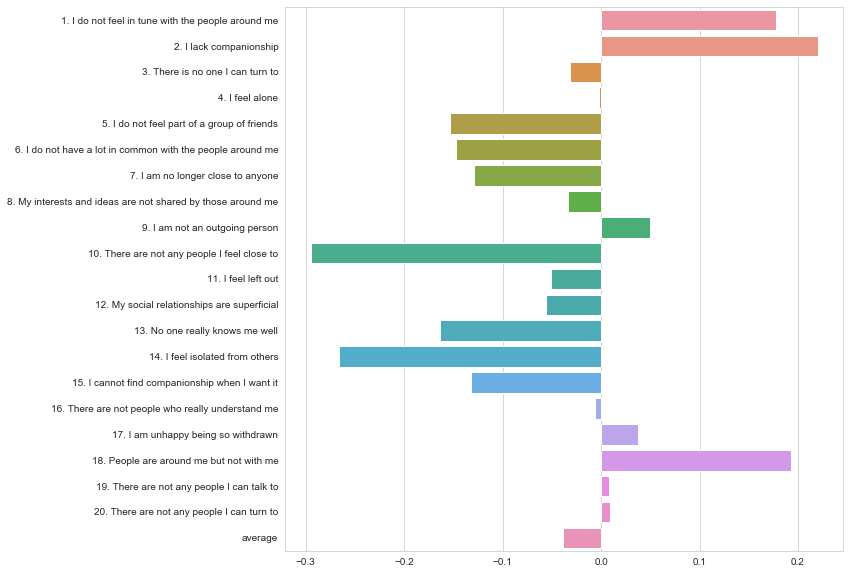

In [509]:
def feature_differences(df):
        
        diffs = []
        for col in df.columns[2:]:
            diff = (df.loc[df.type=='post', col].mean() -
                    df.loc[df.type=='pre', col].mean())
            diffs.append(diff)

        pre_mean = stats.mean([df.loc[df.type=='pre', col].mean()
                               for col in df.columns[2:]])

        post_mean = stats.mean([df.loc[df.type=='post', col].mean()
                                for col in df.columns[2:]])
        print('Mean before: {:.3}'.format(pre_mean))
        print('Mean after: {:.3}'.format(post_mean), '\n')

        plt.figure(figsize=(10,10))
        sns.barplot(x=diffs,
                    y=df.columns[2:])
        
feature_differences(loneliness_std)

In [510]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/PerceivedStressScale.csv'
perceived = pd.read_csv(path)
perceived.iloc[:,2].unique()

array(['Sometime', 'Fairly often', 'Almost never', 'Very often', 'Never'],
      dtype=object)

In [511]:
perceived[perceived == 'Never'] = 0
perceived[perceived == 'Almost never'] = 1
perceived[perceived == 'Sometime'] = 2
perceived[perceived == 'Fairly often'] = 3
perceived[perceived == 'Very often'] = 4

In [512]:
perceived_std = perceived.copy()
flip_vars = {'4. In the last month, how often have you felt confident about your ability to handle your personal problems?':
                 '4. In the last month, how often have you not felt confident about your ability to handle your personal problems?',
             '5. In the last month, how often have you felt that things were going your way?':
                 '5. In the last month, how often have you felt that things were not going your way?',
             '7. In the last month, how often have you been able to control irritations in your life?':
                 '7. In the last month, how often have you not been able to control irritations in your life?',
             '8. In the last month, how often have you felt that you were on top of things?':
                 '8. In the last month, how often have you felt that you were not on top of things?'
            }

perceived_std.rename(flip_vars, axis=1, inplace=True)

In [513]:
list(flip_vars.values())[0]

'4. In the last month, how often have you not felt confident about your ability to handle your personal problems?'

In [514]:
for var in list(flip_vars.values()):
    perceived_std.loc[perceived_std[var]==0, var] = 4
    perceived_std.loc[perceived_std[var]==1, var] = 3
    perceived_std.loc[perceived_std[var]==3, var] = 1
    perceived_std.loc[perceived_std[var]==4, var] = 0

In [515]:
perceived_std['average'] = perceived_std.iloc[:, 2:].mean(axis=1)

In [516]:
perceived_sorted = pd.DataFrame({'feature': [var for var in perceived_std.columns[2:]],
                     'avg': [perceived_std[col].mean()
                                  for col in perceived_std.columns[2:]]
                          })
perceived_sorted.sort_index(by='avg', ascending=False, inplace=True)
perceived_sorted = perceived_sorted.reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


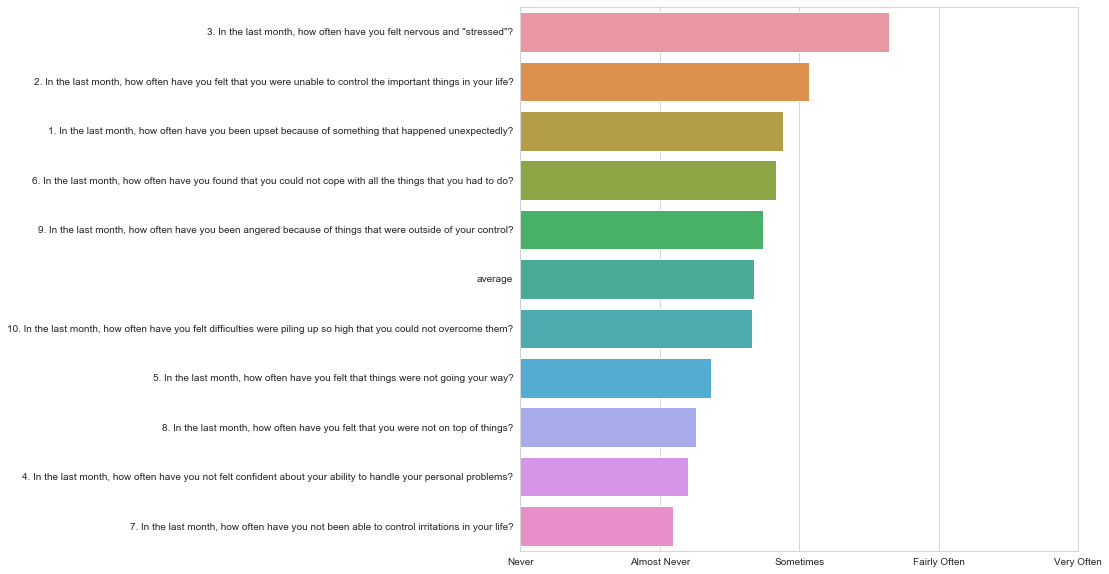

In [517]:
plt.figure(figsize=(10,10))

bplot = sns.barplot(x=[val for val in perceived_sorted.avg],
                    y=[var for var in perceived_sorted.feature])
bplot.set_xticks([0,1,2,3,4])
bplot.set_xticklabels(['Never', 'Almost Never', 'Sometimes', 'Fairly Often', 'Very Often'])

plt.show()

Mean before: 1.64
Mean after: 1.72 



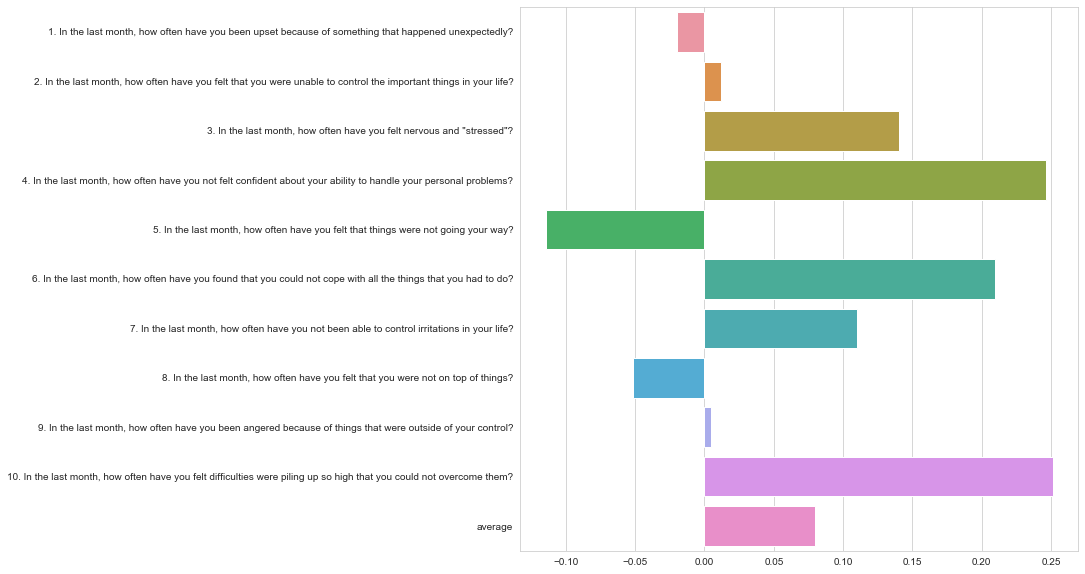

In [518]:
feature_differences(perceived_std)

In [519]:
loneliness_stress_df = loneliness_std.merge(perceived_std, on='uid')

In [520]:
loneliness_stress_df.rename({'type_x':
                                 'type_loneliness',
                             'average_x':
                                 'average_loneliness',
                             'type_y':
                                 'type_stress',
                             'average_y':
                                 'average_stress'},
                           axis=1,
                           inplace=True)

## Regression on Survey

In [521]:
files = {
 'bigfive': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/BigFive.csv',
 'flourishingscale': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/FlourishingScale.csv',
 'lonelinessscale': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/LonelinessScale.csv',
 'panas': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/panas.csv',
 'stress': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/PerceivedStressScale.csv',
 'phq9': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/PHQ-9.csv',
 'psqi': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/psqi.csv',
 'vr12': '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/vr_12.csv'
}

In [522]:
surveys = {}
for file in files:
    path = files[file]
    surveys[file] = pd.read_csv(path)

In [523]:
surveys.keys()

dict_keys(['bigfive', 'flourishingscale', 'lonelinessscale', 'panas', 'stress', 'phq9', 'psqi', 'vr12'])

In [529]:
merged = surveys['bigfive'].merge(loneliness, on='uid', how='outer')


# Adding bluetooth data

In [535]:
path = ('/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/'+
        'sensing/bluetooth/bluetooth.zip')
zip_file = ZipFile(path)

dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
for df in dfs:
    bt_df = dfs[df]
    bt_df['uid'] = df
    
bluetooth = pd.concat([dfs[df] for df in dfs],
                     sort=False).drop(columns=['Unnamed: 0'])

bluetooth.uid = bluetooth.uid.str.split('bt_').str.get(1).str.split('.csv').str.get(0)

uid_series = pd.Series(bluetooth.uid.unique())
connections = pd.DataFrame({'uid': uid_series})
connections['10x_per_day'] = np.nan

for student in uid_series:
    student_data = bluetooth[bluetooth.uid==student]
    student_data_vc = student_data.MAC.value_counts()
    num = len([loc for loc in student_data_vc if loc > 700])
    connections.loc[connections.uid == student, '10x_per_day'] = num
    
connections = connections.sort_values(by='every_day', ascending=False)
bplot=sns.barplot(x=connections.every_day,
                  y=connections.uid,
                  orient='h')
bplot.set_yticklabels([])
plt.show()

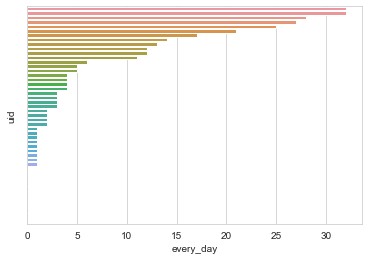

In [608]:
df = loneliness_stress_df.merge(connections, on='uid', how='outer').dropna()

In [609]:
df.corrwith(df.every_day)

average_loneliness   -0.146411
average_stress       -0.371931
every_day             1.000000
twice_per_week        0.703658
dtype: float64

In [610]:
path = '/Users/kristiancanler/Documents/Data/dartmouth_dataset/dataset/survey/PHQ-9.csv'
depression = pd.read_csv(path)
depression.head()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
0,u00,pre,Not at all,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all
1,u01,pre,Several days,Several days,Several days,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Very difficult
2,u02,pre,More than half the days,Several days,More than half the days,More than half the days,More than half the days,Several days,Several days,More than half the days,Not at all,Somewhat difficult
3,u03,pre,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Somewhat difficult
4,u04,pre,Several days,Several days,Not at all,Several days,Several days,Several days,Several days,Not at all,Not at all,Somewhat difficult
